<p style='direction:rtl; text-align: right'>ابتدا باید کتابخانه های زیر را وارد کنیم:
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>pandas: برای کار با فایل</li>
        <li>train_test_split: برای جداسازی داده های اموزشی از داده های تست</li>
        <li>shuffle: برای بر زدن داده ها</li>
        <li>SVC: برای کار با SVM</li>
        <li>metrics: برای بدست اوردن ارزیابی</li>
    </ul>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
%matplotlib notebook

<h1 style='direction:rtl; text-align: right'>
قسمت ۱: انجام الگوریتم SVM روی دیتاست اسکناس
</h1>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۱: خواندن فایل data_banknote_authentication.txt
</h2>
<p style='direction:rtl; text-align: right'>این دیتاست مربوط ویژگی هایی برای شناسایی اسکناس های اصلی و تقلبی است. هر اسکناس چهار ویژگی دارد و دارای یک برچسب صفر یا یک است که اصلی یا تقلبی بودن را نشان می‌دهد.  </p>
<p style='direction:rtl; text-align: right'>از تابع read_csv کتابخانه <a href="https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/">pandas</a> برای دریافت دیتاست استفاده کنید.</p>
<p style='direction:rtl; text-align: right'>حتما حتما از آرگومان names استفاده شود.</p>
<p style='direction:rtl; text-align: right'>از تابع df.drop کتابخانه <a href="https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/">pandas</a>  برای استخراج ویژگی های مورد نیازاستفاده کنید و پارامتر های class و parameter2 و parameter3 را از ویژگی های مورد نیاز خارج کنید. پس فقط با parameter0, parameter1 کار میکنیم.</p>

In [2]:
names=['parameter0', 'parameter1','parameter2','parameter3','class']
main = pd.read_csv('data_banknote_authentication.txt',names=names)
# df.head()
df = main

target = df['class'].values
feature = df.drop(['class','parameter2','parameter3'],axis=1).values
print(target)
print(feature)
main.head()

[0 0 0 ... 1 1 1]
[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]


,parameter0,parameter1,parameter2,parameter3,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<p style='direction:rtl; text-align: right'>همانطور که مشاهده میکنید ستون کلاس مربوط به تقلبی بودن یا نبودن است. </p>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۲: جداسازی های دیتا آموزشی و تست 
</h2>
<p style='direction:rtl; text-align: right'> هدف از این جداسازی در این است که به طور مثال ما یک دیتا ست داریم و میخواهیم پس از یادگیری مدل خودمون، آن مدل را تست کنیم و برای تست داده کافی نداریم، لذا دیتای آموزشی را به دو بخش تقسیم میکنیم. یک بخش برای یادگیری مدلمان است و یک بخش برای تست صحت عملکرد مدل </p>
<p style='direction:rtl; text-align: right'>از تابع shuffle برای بهم ریختن دیتا ها استفاده میکنیم که به طور مثال تمام اسکناس هایی که اصلی هستند کنار هم قرار نگیرند و در نتیجه وقتی دیتا ها را بین اموزش و تست تقسیم میکنیم همه دیتا های تست اسکناس اصلی نباشند تا بتوانیم صحت عملکرد را به درستی مشخص کنیم.</p>
<p style='direction:rtl; text-align: right'>از تابع train_test_split با train_size=.9 استفاده کنید.<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">راهنمایی</a></p>


In [3]:
X = feature
Y = target

X, Y = shuffle(X,Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

#x_train = []
#y_train = []
#x_test = []
#y_test = []


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۳: ساخت یک شیی از کلاس SVC 
</h2>
<p style='direction:rtl; text-align: right'>یک شیی از کلاس SVC با kernel خطی بسازید<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">راهنمایی</a></p>




In [4]:
model = SVC(kernel='linear')

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۴: فیت کردن مدل با استفاده از الگوریتم SVM  
</h2>
<p style='direction:rtl; text-align: right'>از تابع fit موجود در شیی خود استفاده کنید.<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">راهنمایی</a></p>





In [5]:
model.fit(X,Y)

SVC(kernel='linear')

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۵: صحت عملکرد مدل در حالت آموزشی   
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع predict جواب خروجی الگوریتم روی داده تمرینی (x_train) را در آرایه y_pred ذخیره کنید. 
    حال با داشتن خروجی پیش بینی شده از این قسمت یعنی y_pred و همچنین خروجی واقعی موجود در دیتا ست صحت عملکرد مدل خود را با کمک دستور accuracy_score نسبت به دیتای آموزشی پیدا میکنیم.<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">راهنمایی</a></p>

<p style='direction:rtl; text-align: right'>accuracy_score برابر تعداد کلاس های اسکناس(تقلبی و اصلی) درست پیش بینی شده به کل حالات است<img src="https://miro.medium.com/max/2868/1*WGK_3mj_KBZh9yTiLXGh-A.png"></p>

<p style='direction:rtl; text-align: right'>چند نمونه دیگر از معیار های سنجش داده مانند precision و recall و f1-score نیز وجود دارند و هرکدام بیانگر ویژگی منحصر به فردی میباشند.<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm"></p>
<p style='direction:rtl; text-align: right'>برای استفاده از این معیار ها میتوانید از توابع precision و recall و f1-score  <a href="https://en.wikipedia.org/wiki/Precision_and_recall"> راهنمایی </a>استفاده کنید </p>

<p style='direction:rtl; text-align: right'>با استفاده از لینک زیر به موارد استفاده این معیار ها میرسید:<a href="https://en.wikipedia.org/wiki/Precision_and_recall"> لینک </a></p>


<p style='direction:rtl; text-align: right'>سپس یک کد بنویسید که دقت جواب را محاسبه کند. خروجی باید با خروجی accuracy_score یکی باشد.</p>
<p style='direction:rtl; text-align: right'>سپس یک کد بنویسید که مقادیر precision و recall و f1-score جواب را محاسبه کند. خروجی باید با خروجی precision و recall و f1-score یکی باشد.</p>


In [6]:
y_pred =model.predict(x_train)
print(accuracy_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(f1_score(y_train, y_pred))
# Then write your own code to compute accuracy, recall, precision and f1
TP=0
TN=0
FP=0
FN=0
for i in range(len(y_pred)):
    if y_pred[i]==1 and y_train[i]==1:
        TP=TP+1
    elif y_pred[i]==0 and y_train[i]==0 :
        TN=TN+1
    elif y_pred[i]==1 and y_train[i]==0 :
        FP=FP+1
    else :
        FN=FN+1
accuracy=(TN+TP)/(TN+TP+FP+FN)
precision = TP/(TP+FP) 
recall=TP/(TP+FN)
f1_scoree=2*precision*recall/(precision+recall)
print('accuracy=',accuracy)
print('recall=',recall)
print('precision =',precision)
print('f1_score=',f1_scoree)

0.8752025931928687
0.8579234972677595
0.8610603290676416
0.8594890510948905
accuracy= 0.8752025931928687
recall= 0.8579234972677595
precision = 0.8610603290676416
f1_score= 0.8594890510948905


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۶: صحت عملکرد مدل در حالت تست   
</h2>
<p style='direction:rtl; text-align: right'> حال کار قسمت قبل را روی داده تست یعنی x_test انجام دهید و دقت جواب را چاپ کنید.</a></p>



In [7]:
y_pred_test =model.predict(x_test)
print(accuracy_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test))

TP=0
TN=0
FP=0
FN=0
for i in range(len(y_pred_test)):
    if y_pred_test[i]==1 and y_test[i]==1:
        TP=TP+1
    elif y_pred_test[i]==0 and y_test[i]==0 :
        TN=TN+1
    elif y_pred_test[i]==1 and y_test[i]==0 :
        FP=FP+1
    else :
        FN=FN+1
accuracy=(TN+TP)/(TN+TP+FP+FN)
precision = TP/(TP+FP) 
recall=TP/(TP+FN)
f1_scoree=2*precision*recall/(precision+recall)
print('accuracy=',accuracy)
print('recall=',recall)
print('precision =',precision)
print('f1_score=',f1_scoree)


0.8768115942028986
0.819672131147541
0.8928571428571429
0.8547008547008548
accuracy= 0.8768115942028986
recall= 0.819672131147541
precision = 0.8928571428571429
f1_score= 0.8547008547008548


<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۷: نمایش داده ها به صورت ۲ بعدی   
</h2>
<p style='direction:rtl; text-align: right'>ابتدا با استفاده از scatter  دیتای خود یعنی x_train را نمایش دهید. داده‌های تقلبی و اصلی را با دو رنگ نشان دهید.</p>

<p style='direction:rtl; text-align: right'>حال خط بدست آمده توسط الگوریتم SVM را نمایش دهید. برای پیدا کردن معادله خط جدا کننده از دستور decision_function در کلاس SVC کمک بگیرید. برای رسم تابع از دستور contour استفاده کنید. <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html">راهنمایی</a>
</p>



<IPython.core.display.Javascript object>


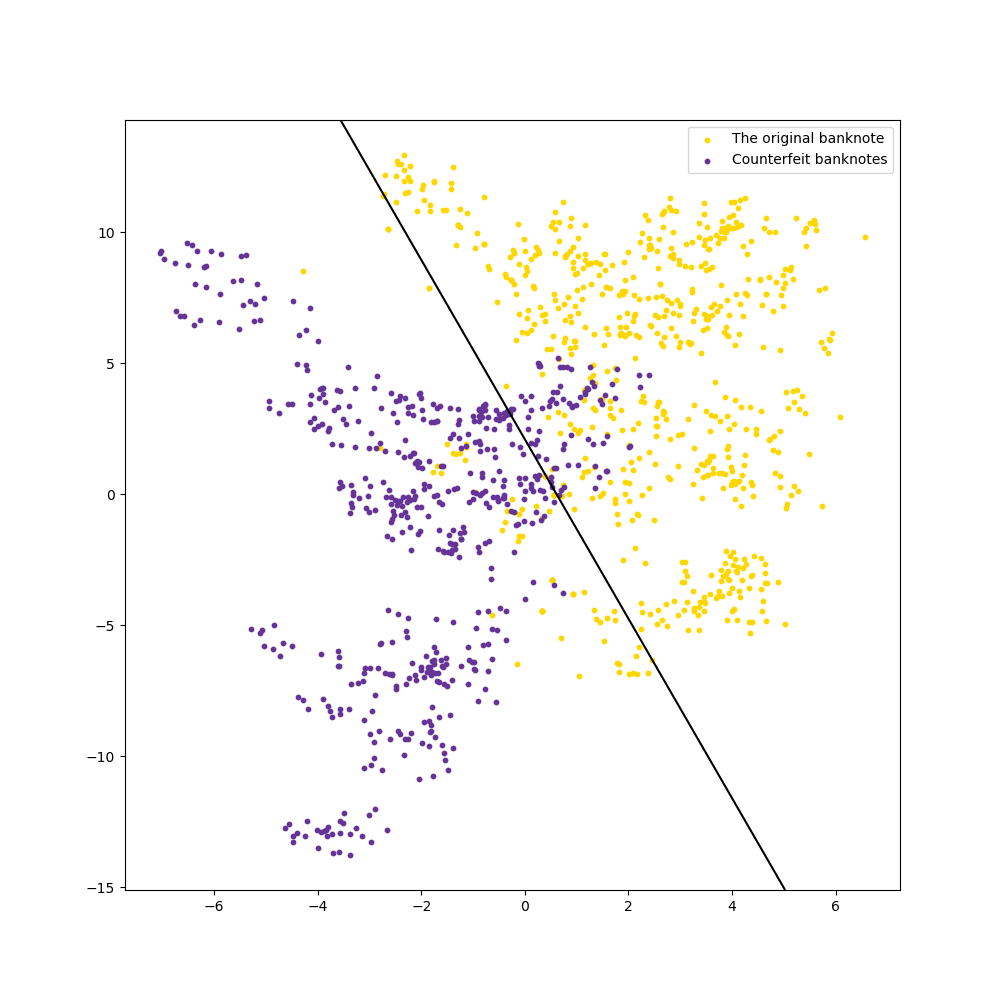

In [8]:
x_train0=np.array([0,0])
x_train0=x_train0.reshape(1,2)
x_train1=np.array([1,1])
x_train1=x_train0.reshape(1,2)
for i in range(len(y_train)):
    if y_train[i]==0:
        a=x_train[i].reshape(1,2)
        x_train0=np.concatenate((x_train0,a),axis=0)
    else:
        a=x_train[i].reshape(1,2)
        x_train1=np.concatenate((x_train1,a),axis=0)
        
x_train0=x_train0[1:,]
x_train1=x_train1[1:,]



plt.figure(figsize =(10, 10))
plt.scatter(x_train0[:,0],x_train0[:,1],color="gold",label="The original banknote",s=10)
plt.scatter(x_train1[:,0],x_train1[:,1],color="rebeccapurple",label="Counterfeit banknotes",s=10)
plt.legend()


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1],100)
y = np.linspace(ylim[0], ylim[1],100)
Y, X = np.meshgrid(y, x)
a = np.vstack([X.ravel(), Y.ravel()]).T
h= model.decision_function(a).reshape(X.shape)

ax.contour(X, Y, h, colors='k',levels=[0])

plt.show()

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۸: اجرای دوباره الگوریتم روی ۳ ویژگی   
</h2>
<p style='direction:rtl; text-align: right'>تمام مراحل قبل را روی سه ویژگی اول یعنی parameter0, parameter1, parameter2 تکرار کنید.</p>







In [9]:
names=['parameter0', 'parameter1','parameter2','parameter3','class']
main = pd.read_csv('data_banknote_authentication.txt',names=names)
# df.head()
df = main
main.head()
target = df['class'].values
feature = df.drop(['class','parameter3'],axis=1).values
print(target)
print(feature)

[0 0 0 ... 1 1 1]
[[  3.6216    8.6661   -2.8073 ]
 [  4.5459    8.1674   -2.4586 ]
 [  3.866    -2.6383    1.9242 ]
 ...
 [ -3.7503  -13.4586   17.5932 ]
 [ -3.5637   -8.3827   12.393  ]
 [ -2.5419   -0.65804   2.6842 ]]


In [10]:
X = feature
Y = target

X, Y = shuffle(X,Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

#x_train = []
#y_train = []
#x_test = []
#y_test = []


In [11]:
model = SVC(kernel='linear')

In [12]:
model.fit(X,Y)

SVC(kernel='linear')

In [13]:
y_pred = model.predict(x_train)
print(accuracy_score(y_train, y_pred))

0.9886547811993517


In [14]:
y_pred_test = model.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.9927536231884058


<h3 style='direction:rtl; text-align: right'>
قسمت ۱.۸.۲: بدست آوردن نقاطی از صفحه بدست آمده در الگوریتم SVM   
</h3>
<p style='direction:rtl; text-align: right'>در این تابع، هدف پیدا کردن مولفه z صفحه بدست آمده در الگوریتم با استفاده از مولفه های x و y هست.</p>








In [15]:
def calculate_z(x,y):
    return (-model.intercept_[0]-model.coef_[0][0]*x -model.coef_[0][1]*y) / model.coef_[0][2]

<h3 style='direction:rtl; text-align: right'>
قسمت ۱.۸.۲:  نمایش داده ها به صورت ۳ بعدی   
</h3>
<p style='direction:rtl; text-align: right'>ابتدا با استفاده از scatter3D  دیتای خود را نمایش می دهیم.</p>

<p style='direction:rtl; text-align: right'>سپس صفحه گذرا از نقاط بدست آمده توسط الگوریتم را میکشیم.</p>

<p style='direction:rtl; text-align: right'>میتوانید نمودار را با استفاده از دکمه pan در روی نمودار تکان دهید و از زوایای متفاوت ببینید.</p>



<IPython.core.display.Javascript object>


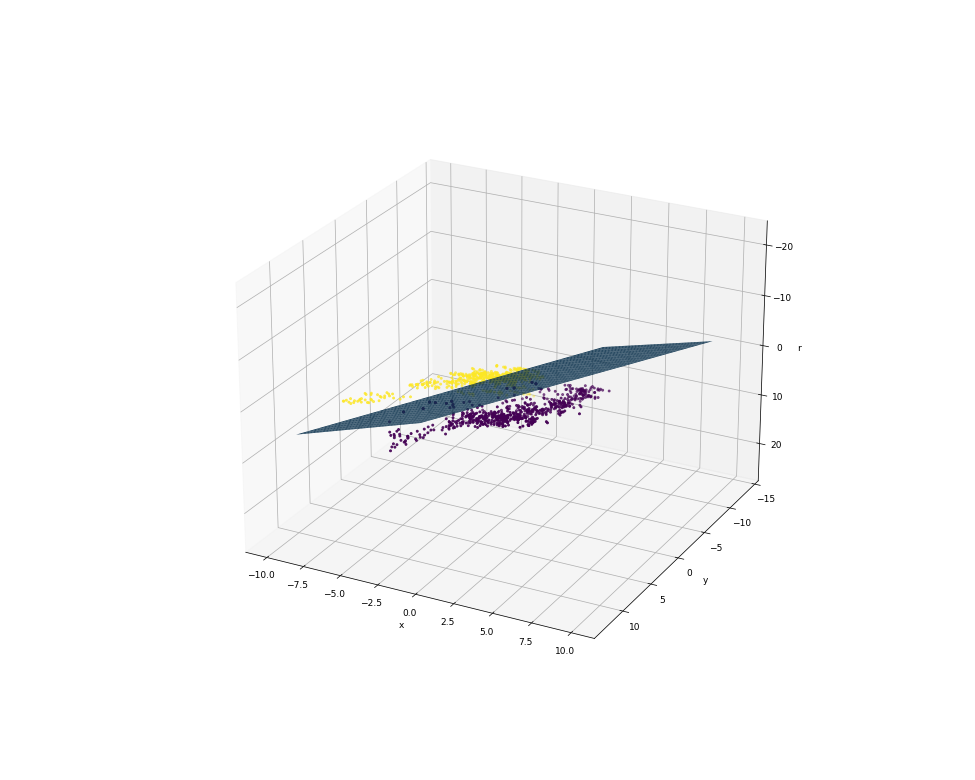

Text(0.5, 0, 'r')

In [16]:

fig2=plt.figure(figsize=(15,12), dpi=65)

ax2 = fig2.add_subplot(projection='3d')
ax2.scatter3D(x_train[:, 0], x_train[:, 1], x_train[:,2], c=y_train, s=5)

tmp = np.linspace(-10,10,30)
x,y = np.meshgrid(tmp,tmp)

ax2.plot_surface(x, y, calculate_z(x,y))
ax2.view_init(elev=-158, azim=-96)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('r')